## <span style="color:orange;"> Grayscale/Desaturation </span>

"Grayscaling" an image, also called desaturation, is when all the color in the image is transformed to appear as a shade of gray without apparent color. Specifically, these shades represent the intensity information of the light. This can be done for a variety of reasons, from taking up less storage space to aesthetics.

When coding this transformation, there are a multitude of different methods that can be used, many of which involve calculus principles. However, some of the mathematics that may be assumed to work don't produce accurate results. Even if the resulting image looks like its been grayscaled, some of the darks or lights might be too pronounced, or the shadows might be outlined, causing the blending to look awkward.

Lets try some different methods to produce new images.

In [86]:
# Import necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

# Function to show original and grayscaled images
def showimage(img,new):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    ax[0].imshow(np.array(img))
    ax[0].axis('off')   
    ax[1].imshow(np.array(new), cmap='gray')
    ax[1].axis('off')            
    plt.show()

### <span style="color:red"> Exercise </span>

Take the magnitude of (R, G, B) for the pixels of an image, apply it to the original image, and see what the result is.

<h3 style="background-color:lightblue"> Write Answers for Exercise  Below </h3>

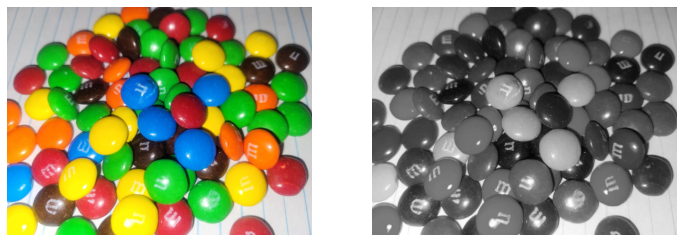

In [87]:
def magnitudemethod(img):
    img = np.array(img)
    # Solution ###
    for i in range(0, len(img)):
        mag = ((img[i,0]**2) + (img[i,1]**2) + (img[i,2]**2)) ** (1/2) #fill in here
    img = np.dot(img, mag)
    ##############
    return img

img = Image.open('mnms.jpg')
new = magnitudemethod(img)
showimage(img,new)

At first glance, this might seem like a perfectly reasonable solution, since everything is grayed over and the highlights and shadows match the original picture. However, some of colors are actually completely off, such as the blue colors being too light while the yellows being too dark. Along with this, the shadows and highlights don't blend very well, which results in some of the objects looking awkward. These issues might seem minimal, with some of them not even being noticeable until compared with a more proper solution (which will be done later), but they are nonetheless issues, meaning this is not the best solution for grayscaling an image.

### <span style="color:red"> Exercise </span>

Take the dot product of the image array and `[0.2989, 0.5870, 0.1140]`.

<h3 style="background-color:lightblue"> Write Answers for Exercise  Below </h3>

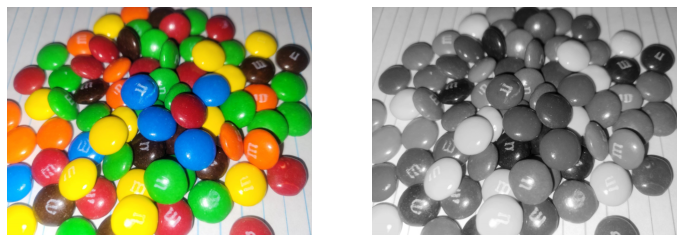

In [88]:
def rgb2gray(img):
    img = np.array(img)
    return np.dot(img, [0.2989, 0.5870, 0.1140]) #fill in here

img = Image.open('mnms.jpg')
new = rgb2gray(img)
showimage(img,new)

If you compare the resulting grayscaled image to the other methods used, you can better see that the other methods aren't producing the correct images. The correctly grayscaled image has more subdued tones and the colors blend together better. Besides this, the image also has more definition. The other methods produced images where the objects looked flat or 2-dimensional even though they're 3-dimensional objects, primarily due to a lack of blending.

Try playing around with the vector values to see what happens to the resulting image. For example, try making one value much larger or smaller than the other two, making all the values extremely large or small, etc. You can get some super weird looking images from doing this!